<a href="https://colab.research.google.com/github/AbhishekKaushikCV/HCI/blob/main/Transition_matrix_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Transition matrix:
## Task:
- To show a transition between the apps( we have 'n' applications)
- Count it along all the other apps
- Store it in the form of a matrix (n*n matrix)

- Name of apps on x and y axis
- For example: if a current app is 'n0' : i have to find how many times there is a switch between n0 to all other apps



In [78]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [79]:
app_data = pd.read_csv('app_data.csv')

In [80]:
app_data.loc[50:100]

,name,time,timeDate
50,com.huawei.android.launcher,486003216502298,09.08.2019 09:15:12.427
51,com.instagram.android,486005321012714,09.08.2019 09:15:14.531
52,com.huawei.android.launcher,486998448143812,09.08.2019 09:31:47.659
53,ch.ethz.inf.vs.staals.visualattentionrecorder,487003135912562,09.08.2019 09:31:52.346
54,com.huawei.android.launcher,498108435405928,09.08.2019 12:36:58.071
55,com.whatsapp,498109455487178,09.08.2019 12:36:59.091
56,com.huawei.android.launcher,498113557825198,09.08.2019 12:37:03.193
57,com.google.android.gm,498114063071031,09.08.2019 12:37:03.699
58,com.huawei.android.launcher,498116271296031,09.08.2019 12:37:05.907
59,ch.ethz.inf.vs.staals.visualattentionrecorder,498117839692906,09.08.2019 12:37:07.475


In [81]:
unique_apps

array(['com.huawei.android.launcher', 'com.google.android.gm',
       'ch.ethz.inf.vs.staals.visualattentionrecorder',
       'com.android.deskclock', 'com.apple.android.music',
       'com.google.android.apps.books', 'com.instagram.android',
       'com.facebook.katana', 'com.netflix.mediaclient',
       'com.android.systemui', 'com.whatsapp', 'com.huawei.systemmanager',
       'com.android.chrome', 'com.huawei.android.hwouc',
       'com.google.android.youtube', 'com.huawei.search',
       'com.wahanda.marketplace', 'com.ohh2ahh.zuerimensa',
       'com.pinterest', 'com.huawei.camera', 'com.android.calendar',
       'com.microsoft.office.word', 'com.android.incallui',
       'ch.admin.meteoswiss', 'com.google.android.apps.maps',
       'com.android.settings', 'com.huawei.android.internal.app',
       'com.thisclicks.wiw', 'com.android.calculator2',
       'com.android.contacts', 'com.android.gallery3d',
       'com.example.android.notepad', 'com.adobe.lrmobile',
       'com.huawei.hi

In [82]:
len(unique_apps)

36

In [83]:
# Change  the string app name to integer
app_names = app_data.name.unique() # Different app names used in the data
changed_names = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35] # New app names

app_data = app_data.replace(to_replace=app_names,value=changed_names) # Replace old names by new namesprint(app_data)

In [84]:
app_data

,name,time,timeDate
0,0,453886603627243,09.08.2019 00:19:53.046
1,1,453888156162139,09.08.2019 00:19:54.598
2,0,453933167223590,09.08.2019 00:20:39.609
3,2,453933673994423,09.08.2019 00:20:40.116
4,1,453936877236089,09.08.2019 00:20:43.319
...,...,...,...
730,2,1194522518849319,23.08.2019 22:18:12.193
731,0,1194536550817025,23.08.2019 22:18:26.225
732,35,1194537057995671,23.08.2019 22:18:26.733
733,0,1194725318710747,23.08.2019 22:21:34.993


In [85]:
number

0       0
1       1
2       0
3       2
4       1
       ..
730     2
731     0
732    35
733     0
734     2
Name: name, Length: 735, dtype: int8

In [86]:
number = app_data.name
number[0]

0

In [87]:
number = number.astype(np.int8) # Convert to type int8

In [89]:
type(number[0])

numpy.int8

In [90]:
# Create a transition matrix

def transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    #for row in M:
        #s = sum(row)
        #if s > 0:
            #row[:] = [f/s for f in row]
    return M

#test:

#t = [1,1,2,6,8,5,5,7,8,8,1,1,4,5,5,0,0,0,1,1,4,4,5,1,3,3,4,5,4,1,1]
m = transition_matrix(number)
for row in m: print(' '.join('{0:0}'.format(x) for x in row))

17 11 111 2 1 1 61 24 3 9 24 0 10 1 6 4 4 2 2 0 1 0 0 2 2 0 0 3 1 1 2 3 1 0 1 2
12 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
106 1 3 0 0 0 4 0 0 6 4 0 1 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
56 0 5 0 0 0 11 0 0 4 5 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
20 0 4 0 0 0 0 4 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
9 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
8 0 1 0 0 0 4 0 6 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
31 0 1 0 0 0 0 1 1 2 12 1 3 0 2 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
11 0 1 0 0 0 1 0 0 0 4 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [91]:
# to check the correctness
total=sum(map(sum, m))
print(total)

734


In [92]:
arr = np.array(m)

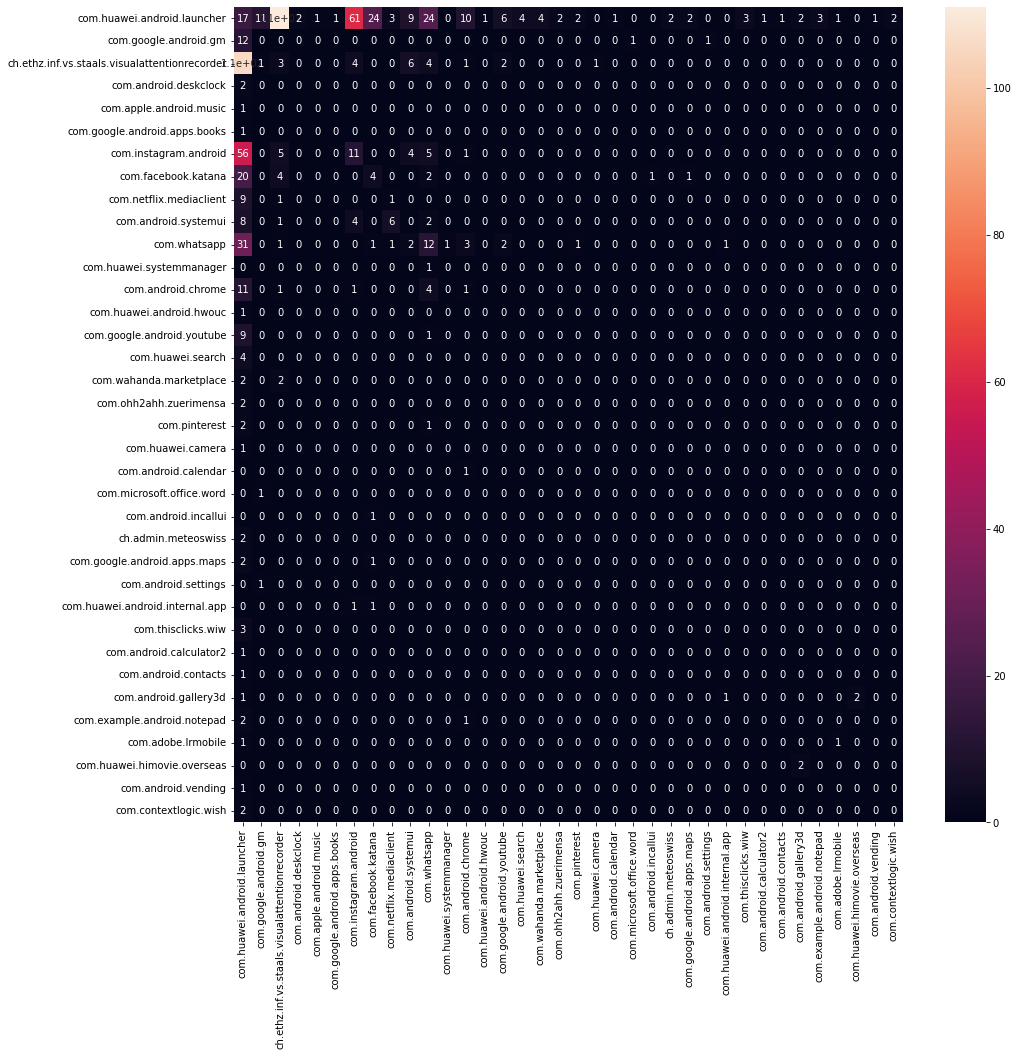

In [93]:
# Plot the heatmap using the above matrix
plt.figure(figsize=(15,15))
ax = sns.heatmap(arr,annot=True,xticklabels=unique_apps,yticklabels=unique_apps)
plt.savefig('transition.png')

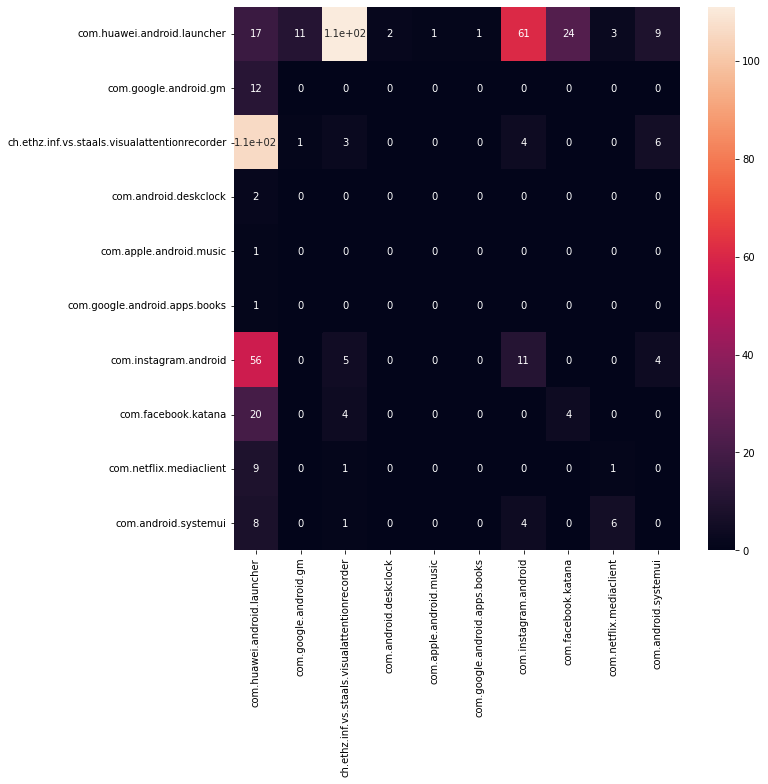

In [94]:
s_arr = arr[0:10,0:10]
plt.figure(figsize=(10,10))
s_ax = sns.heatmap(s_arr,annot=True,xticklabels=unique_apps[0:10],yticklabels=unique_apps[0:10])
plt.savefig('10_apps_transition.png')